In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau, pearsonr
plt.style.use('ggplot')
%matplotlib inline

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [180]:
data=pd.read_csv('x_train.csv',header=0,sep=';')

In [181]:
data

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1
5,0,1,1,1,3.000000,0,0,0.000000,113000,250,0,1
6,13,14,2,19,15.500000,0,5,0.800000,3831000,2875,34,2
7,13,14,5,26,14.769231,0,4,0.500000,3458000,2375,31,2
8,2,3,1,3,7.666667,0,0,0.000000,420000,750,6,1
9,1,2,3,5,3.000000,1,0,0.000000,113000,250,3,1


In [182]:
data.describe()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
count,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,2.528900e+04,25289.000000,25289.000000,25289.000000
mean,18.424888,12.415991,3.507612,26.841393,13.330451,0.152438,4.901222,0.534841,2.884268e+06,2138.215232,26.884495,2.725058
std,20.172964,12.991894,6.766648,39.993029,6.657224,0.359452,6.630469,0.402091,3.415374e+06,2169.987109,29.403565,2.765350
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,4.000000,3.000000,1.000000,4.000000,8.400000,0.000000,0.000000,0.000000,4.830000e+05,575.000000,6.000000,1.000000
50%,11.000000,8.000000,1.000000,12.000000,14.555556,0.000000,2.000000,0.619048,1.700000e+06,1500.000000,18.000000,1.000000
75%,27.000000,16.000000,3.000000,31.000000,17.720000,0.000000,6.000000,1.000000,3.890000e+06,2875.000000,37.000000,3.000000
max,146.000000,142.000000,186.000000,563.000000,40.000000,1.000000,81.000000,1.000000,3.133800e+07,24275.000000,319.000000,14.000000


In [183]:
data.shape

(25289, 12)

In [184]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['maxPlayerLevel', 'numberOfAttemptedLevels', 'attemptsOnTheHighestLevel', 'totalNumOfAttempts', 'averageNumOfTurnsPerCompletedLevel', 'doReturnOnLowerLevels', 'numberOfBoostersUsed', 'fractionOfUsefullBoosters', 'totalScore', 'totalBonusScore', 'totalStarsCount', 'numberOfDaysActuallyPlayed']


In [185]:
# У нас только числовые признаки, категориальных нет

In [186]:
data[numerical_columns].describe()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
count,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,2.528900e+04,25289.000000,25289.000000,25289.000000
mean,18.424888,12.415991,3.507612,26.841393,13.330451,0.152438,4.901222,0.534841,2.884268e+06,2138.215232,26.884495,2.725058
std,20.172964,12.991894,6.766648,39.993029,6.657224,0.359452,6.630469,0.402091,3.415374e+06,2169.987109,29.403565,2.765350
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,4.000000,3.000000,1.000000,4.000000,8.400000,0.000000,0.000000,0.000000,4.830000e+05,575.000000,6.000000,1.000000
50%,11.000000,8.000000,1.000000,12.000000,14.555556,0.000000,2.000000,0.619048,1.700000e+06,1500.000000,18.000000,1.000000
75%,27.000000,16.000000,3.000000,31.000000,17.720000,0.000000,6.000000,1.000000,3.890000e+06,2875.000000,37.000000,3.000000
max,146.000000,142.000000,186.000000,563.000000,40.000000,1.000000,81.000000,1.000000,3.133800e+07,24275.000000,319.000000,14.000000


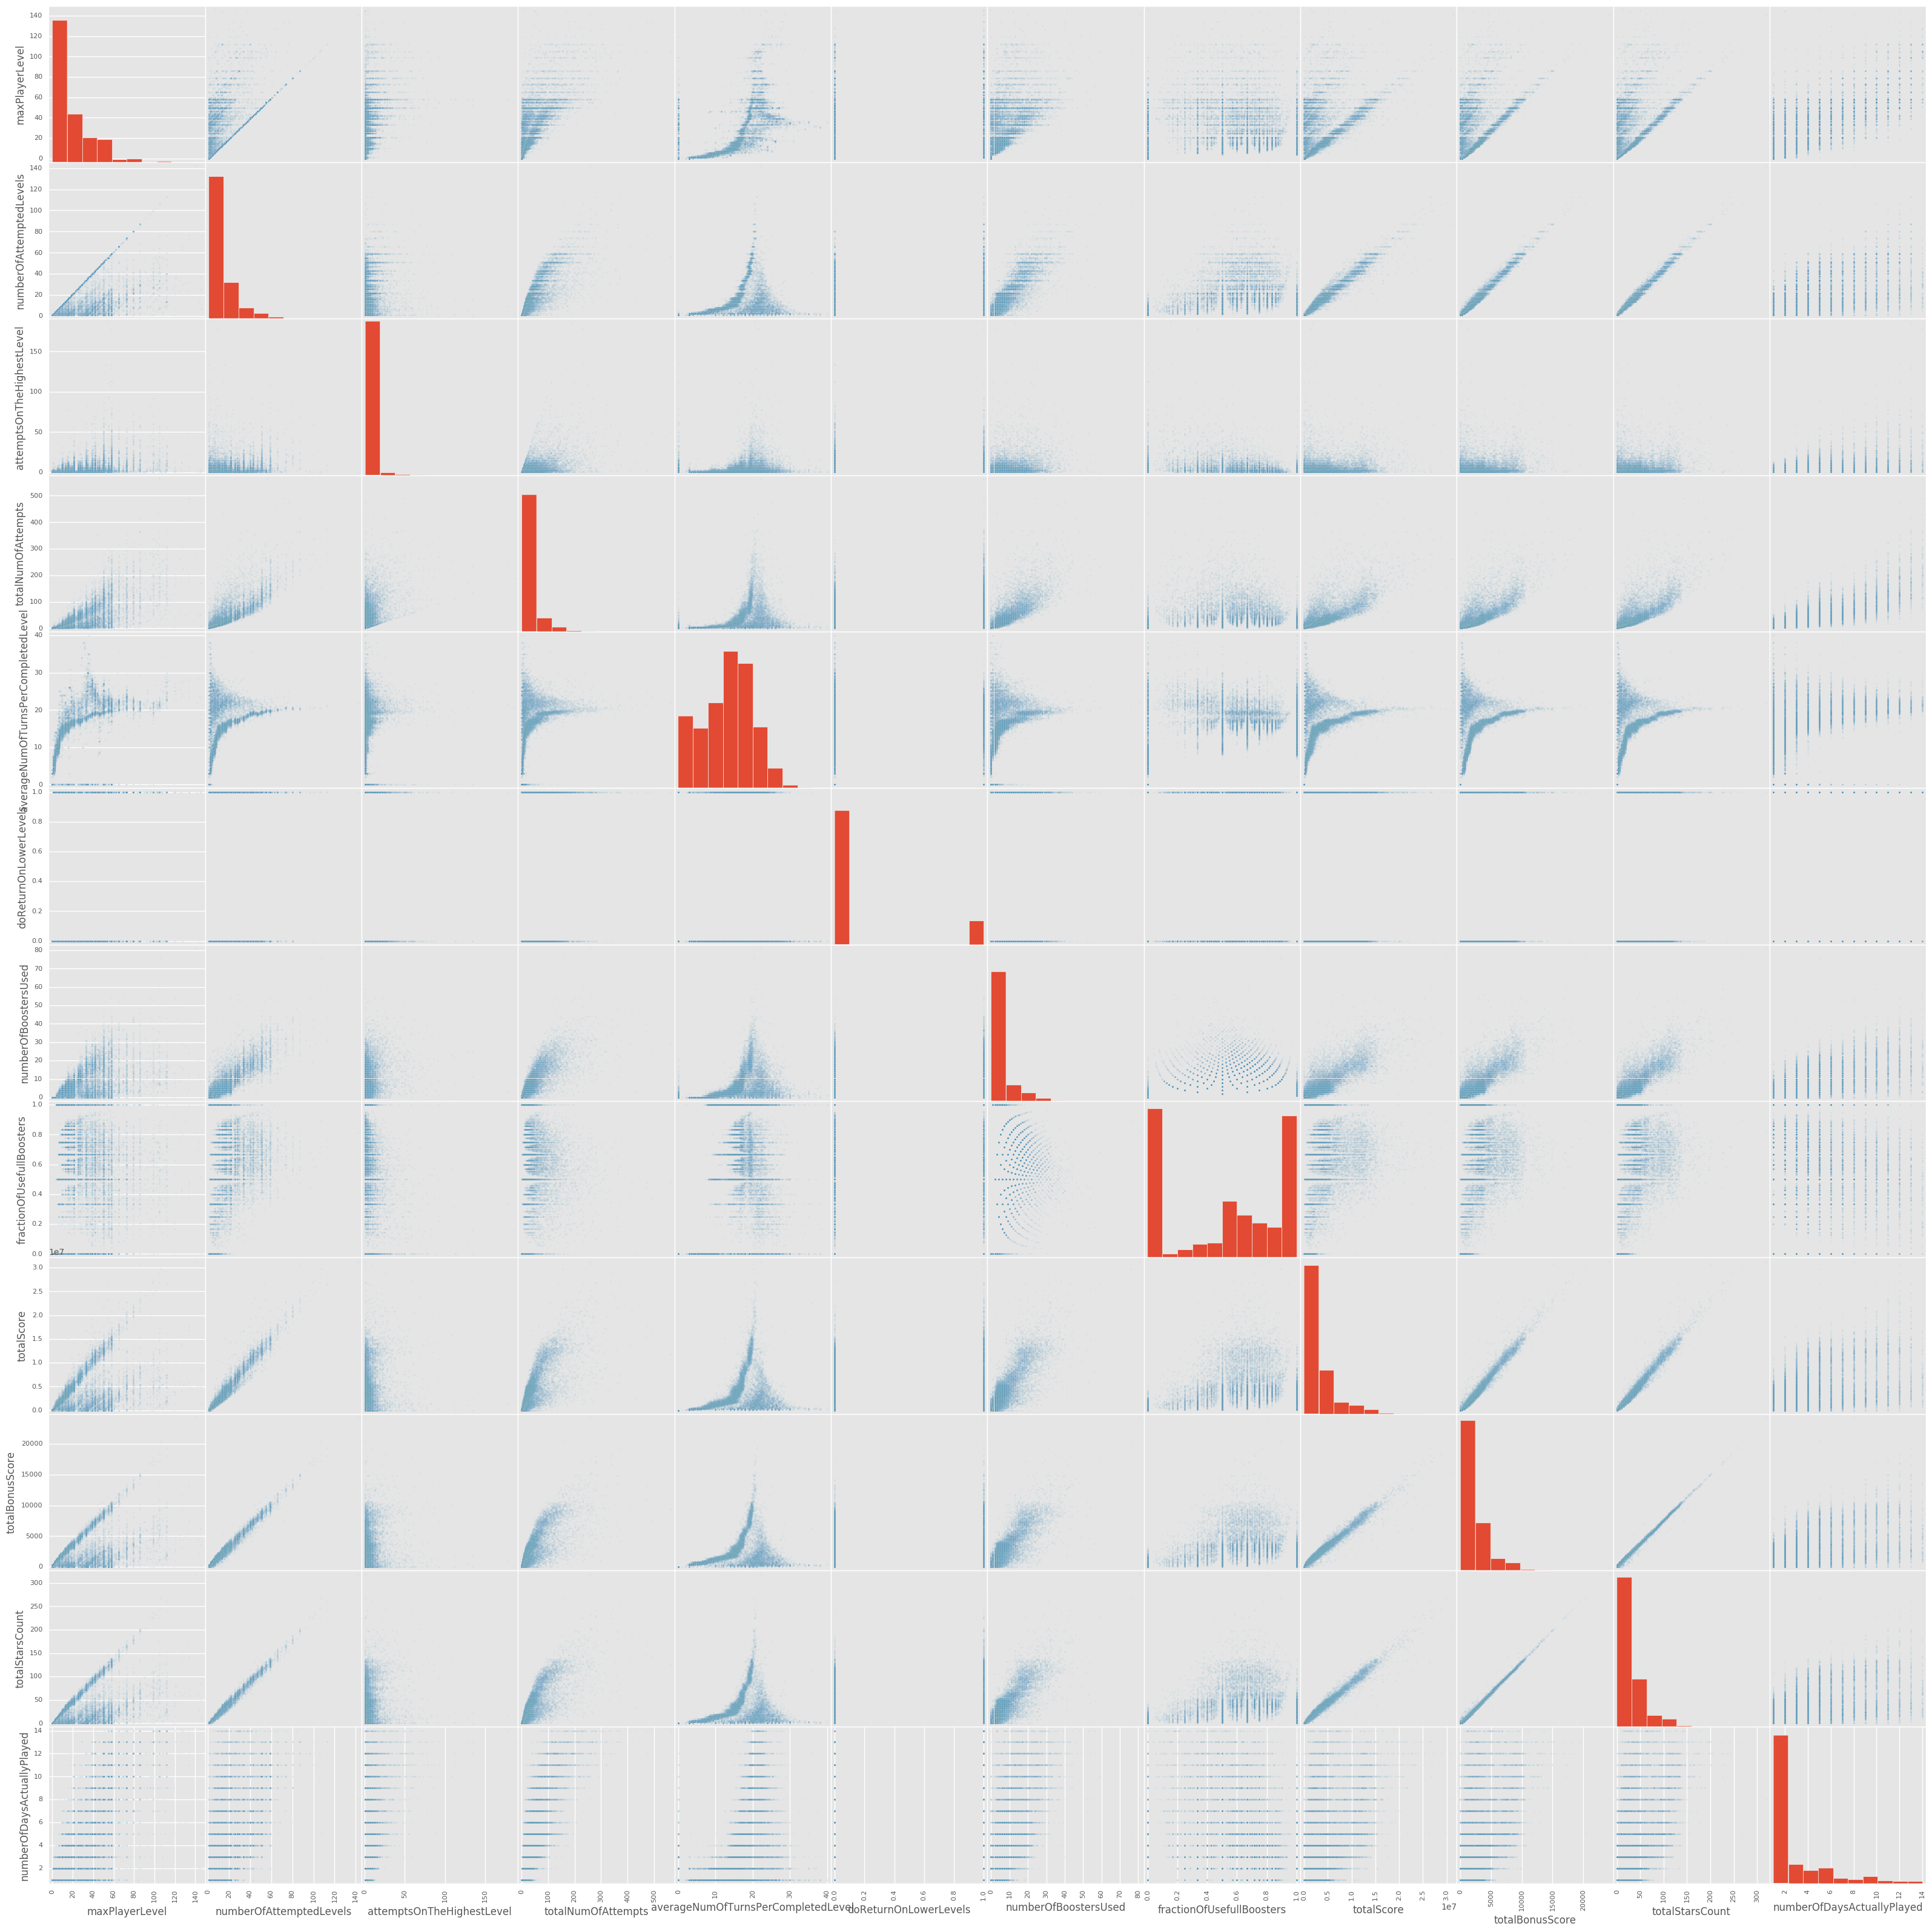

In [187]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(40, 40));

In [188]:
data.corr()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
maxPlayerLevel,1.000000,0.616157,0.472142,0.757854,0.683706,0.368297,0.675955,0.126235,0.570234,0.551366,0.579593,0.793385
numberOfAttemptedLevels,0.616157,1.000000,0.300797,0.836398,0.531197,0.290636,0.881915,0.332887,0.979954,0.989014,0.993779,0.663450
attemptsOnTheHighestLevel,0.472142,0.300797,1.000000,0.532032,0.277072,0.197035,0.389465,-0.041700,0.277326,0.264804,0.281343,0.524109
totalNumOfAttempts,0.757854,0.836398,0.532032,1.000000,0.509510,0.391969,0.836706,0.128843,0.798051,0.795570,0.808989,0.846448
averageNumOfTurnsPerCompletedLevel,0.683706,0.531197,0.277072,0.509510,1.000000,0.250261,0.543847,0.457168,0.499681,0.489411,0.514770,0.555594
doReturnOnLowerLevels,0.368297,0.290636,0.197035,0.391969,0.250261,1.000000,0.320439,0.071646,0.310218,0.271397,0.288803,0.383024
numberOfBoostersUsed,0.675955,0.881915,0.389465,0.836706,0.543847,0.320439,1.000000,0.203519,0.854263,0.851824,0.862254,0.751712
fractionOfUsefullBoosters,0.126235,0.332887,-0.041700,0.128843,0.457168,0.071646,0.203519,1.000000,0.328287,0.358474,0.358219,0.058929
totalScore,0.570234,0.979954,0.277326,0.798051,0.499681,0.310218,0.854263,0.328287,1.000000,0.985111,0.986423,0.617847
totalBonusScore,0.551366,0.989014,0.264804,0.795570,0.489411,0.271397,0.851824,0.358474,0.985111,1.000000,0.997357,0.606864


In [189]:
# Узнаем количество пропущенных признаков 
data.count(axis=0)

maxPlayerLevel                        25289
numberOfAttemptedLevels               25289
attemptsOnTheHighestLevel             25289
totalNumOfAttempts                    25289
averageNumOfTurnsPerCompletedLevel    25289
doReturnOnLowerLevels                 25289
numberOfBoostersUsed                  25289
fractionOfUsefullBoosters             25289
totalScore                            25289
totalBonusScore                       25289
totalStarsCount                       25289
numberOfDaysActuallyPlayed            25289
dtype: int64

In [190]:
numerical_columns1=['maxPlayerLevel',
 'numberOfAttemptedLevels',
 'attemptsOnTheHighestLevel',
 'totalNumOfAttempts',
 'averageNumOfTurnsPerCompletedLevel',
 'numberOfBoostersUsed',
 'fractionOfUsefullBoosters',
 'totalScore',
 'totalBonusScore',
 'totalStarsCount',
 'numberOfDaysActuallyPlayed']
# Выбрасываем столбец 'doReturnOnLowerLevels'.

In [191]:
numerical_columns1

['maxPlayerLevel',
 'numberOfAttemptedLevels',
 'attemptsOnTheHighestLevel',
 'totalNumOfAttempts',
 'averageNumOfTurnsPerCompletedLevel',
 'numberOfBoostersUsed',
 'fractionOfUsefullBoosters',
 'totalScore',
 'totalBonusScore',
 'totalStarsCount',
 'numberOfDaysActuallyPlayed']

In [192]:
data_numerical1 = data[numerical_columns1]
data_numerical1 = (data_numerical1 - data_numerical1.mean()) / data_numerical1.std()
data_numerical1.describe()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
count,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04
mean,-1.339520e-16,-3.035300e-16,-1.357564e-16,2.901489e-16,-1.251931e-14,6.270220e-16,-1.114209e-14,-3.310167e-17,-1.191485e-17,1.056005e-16,-3.077911e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.133456e-01,-8.787011e-01,-3.705841e-01,-6.461474e-01,-2.002404e+00,-7.391969e-01,-1.330150e+00,-8.444955e-01,-9.853585e-01,-9.143277e-01,-6.238120e-01
25%,-7.150604e-01,-7.247590e-01,-3.705841e-01,-5.711344e-01,-7.406167e-01,-7.391969e-01,-1.330150e+00,-7.030762e-01,-7.203800e-01,-7.102708e-01,-6.238120e-01
50%,-3.680613e-01,-3.399036e-01,-3.705841e-01,-3.710995e-01,1.840263e-01,-4.375591e-01,2.094215e-01,-3.467463e-01,-2.941101e-01,-3.021571e-01,-6.238120e-01
75%,4.250794e-01,2.758650e-01,-7.501676e-02,1.039833e-01,6.593663e-01,1.657165e-01,1.156850e+00,2.944718e-01,3.395342e-01,3.440231e-01,9.942384e-02
max,6.324064e+00,9.974220e+00,2.696939e+01,1.340630e+01,4.006107e+00,1.147713e+01,1.156850e+00,8.331072e+00,1.020134e+01,9.934697e+00,4.077221e+00


In [193]:
binary_columns=['doReturnOnLowerLevels']

In [194]:
data.doReturnOnLowerLevels.unique()

array([1, 0], dtype=int64)

In [195]:
# Соединим все в одну таблицу

#data = pd.concat((data_numerical1, data.doReturnOnLowerLevels), axis=1)
#data = pd.DataFrame(data, dtype=float)
#print(data.shape)
#print(data.columns)

In [196]:
data1=pd.read_csv('y_train.csv',header=None,sep=';')
data1

,0
0,0
1,1
2,1
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [197]:
X=data
y=data1
feature_names = X.columns
print(feature_names)

Index(['maxPlayerLevel', 'numberOfAttemptedLevels',
       'attemptsOnTheHighestLevel', 'totalNumOfAttempts',
       'averageNumOfTurnsPerCompletedLevel', 'doReturnOnLowerLevels',
       'numberOfBoostersUsed', 'fractionOfUsefullBoosters', 'totalScore',
       'totalBonusScore', 'totalStarsCount', 'numberOfDaysActuallyPlayed'],
      dtype='object')


In [198]:
data_test=pd.read_csv('x_test.csv',header=0,sep=';')
data_test.shape

(25289, 12)

In [199]:
data.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1


In [200]:
data_test.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
0,13,7,2,9,18.000000,0,2,1.0,1565000,1125,16,1
1,3,4,1,4,8.000000,0,0,0.0,602000,900,9,1
2,42,8,3,24,24.714286,0,5,0.4,2196000,1375,17,4
3,39,5,4,13,26.250000,0,0,0.0,1353000,650,8,4
4,6,7,1,7,11.285714,0,2,1.0,1352000,1375,16,1


In [201]:
print(X.shape)
print(y.shape)
#N, d = X.shape

(25289, 12)
(25289, 1)


In [202]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

17702 7587


In [205]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, \
                             GradientBoostingRegressor, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



classifiers = [
    KNeighborsClassifier(3),
    BaggingClassifier(KNeighborsClassifier()),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)



#     GradientBoostingRegressor(), Can't handle mix of binary and continuous

KNeighborsClassifier
****Results****
Accuracy: 72.7297%
Log Loss: 3.8133382727073224
BaggingClassifier
****Results****
Accuracy: 74.1400%
Log Loss: 1.3631732828311798
SVC
****Results****
Accuracy: 71.4248%
Log Loss: 0.5493591142393003
NuSVC
****Results****
Accuracy: 71.2403%
Log Loss: 0.5446878533925753
DecisionTreeClassifier
****Results****
Accuracy: 75.5898%
Log Loss: 8.353231054731184


C:\Users\dimas\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier
****Results****
Accuracy: 80.0975%
Log Loss: 1.1684443537810303
ExtraTreesClassifier
****Results****


C:\Users\dimas\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 80.2425%
Log Loss: 1.2584291268527985
AdaBoostClassifier
****Results****
Accuracy: 82.1537%
Log Loss: 0.6760138448417566
GradientBoostingClassifier
****Results****
Accuracy: 82.2196%
Log Loss: 0.3904705813524109
GaussianNB
****Results****
Accuracy: 77.6592%
Log Loss: 0.766496940478977
LinearDiscriminantAnalysis
****Results****
Accuracy: 81.7451%
Log Loss: 0.4216393551400426
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 80.7434%
Log Loss: 1.4801056925799287


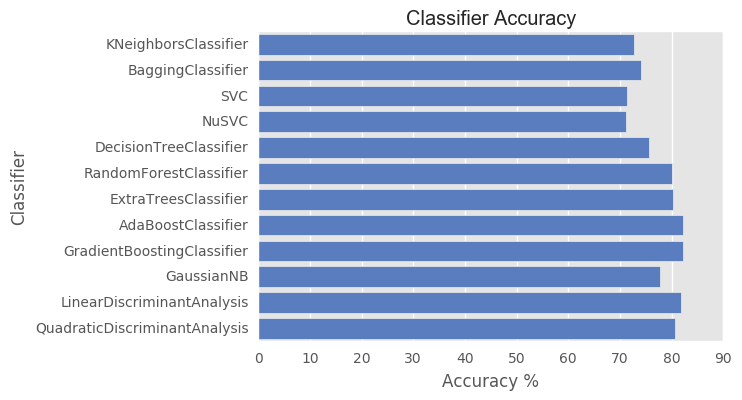

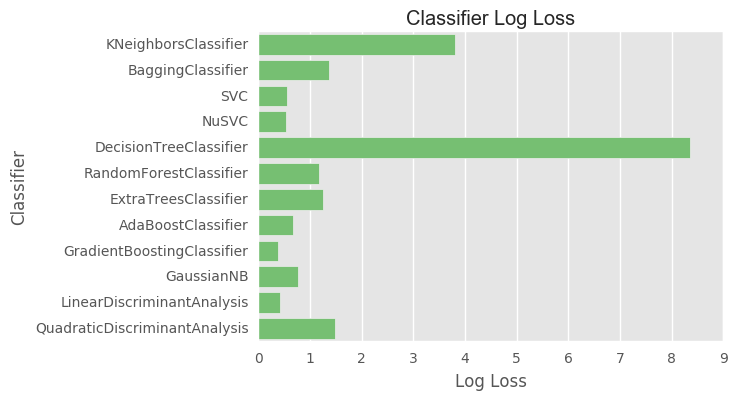

In [206]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [212]:
from sklearn.ensemble import VotingClassifier

clf1 = GradientBoostingClassifier()
clf2 = LinearDiscriminantAnalysis()
clf3 = AdaBoostClassifier()

eclf = VotingClassifier(estimators=[('gb', clf1), ('ld', clf2)], voting='soft')
eclf = eclf.fit(X_train, y_train)

print('****Results****')
train_predictions = eclf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

train_predictions = eclf.predict_proba(X_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

****Results****
Accuracy: 82.4041%
Log Loss: 0.3956942714730545


In [213]:
predictions = eclf.predict_proba(data_test)
print(len(predictions))
submit = pd.DataFrame(predictions)
submit[1].to_csv('submit.csv', index=False)
submit[1].head()

25289


0    0.099590
1    0.033482
2    0.596905
3    0.626491
4    0.050519
Name: 1, dtype: float64